In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import font_manager
from matplotlib.cm import viridis
from scipy.signal import savgol_filter
large=50
medium=30

# Relation of defect numbers with time
This plot shows how the number of defects ($n$) changing with time. 

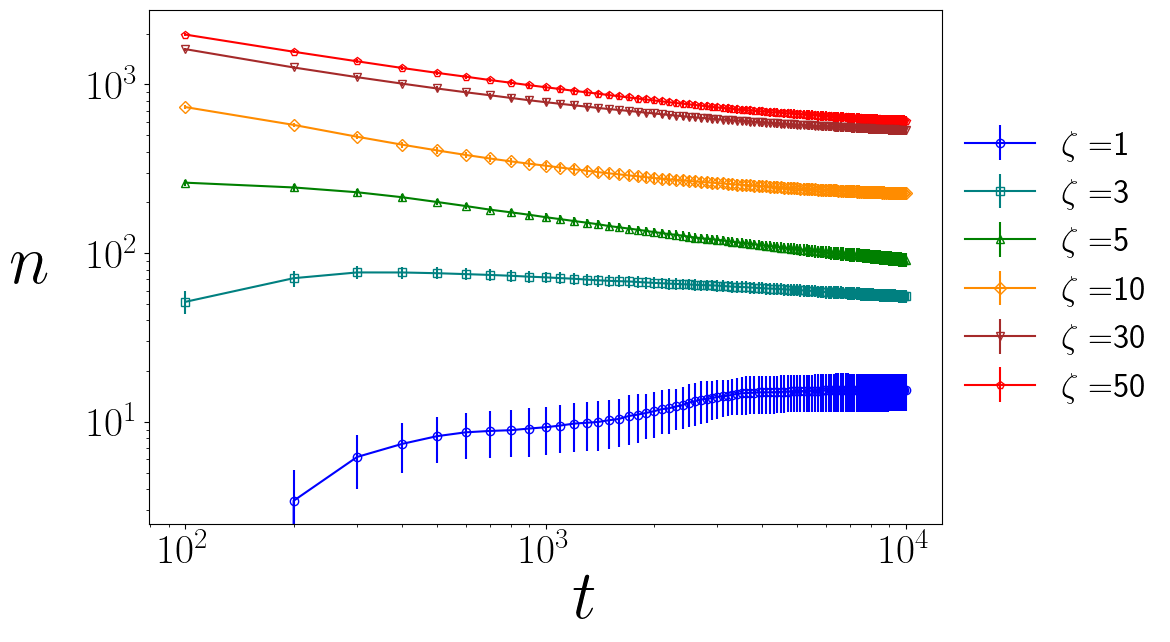

In [21]:
zetaMat = [1,3,5,10,30,50]
plt.close()
plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(12, 6.5))
dt = 1e-3
colors =['blue', 'teal', 'green','darkorange','brown','red']
# colors = ['red', 'brown', 'darkorange', 'green', 'teal', 'blue']
markers = ['o', 's', '^', 'D', 'v', 'p']

for index, zeta in enumerate(zetaMat):
    input_file = f"average_file_zeta_{zeta}.txt"
    data = np.loadtxt(input_file)
    avg_values = np.nanmean(data, axis=1)[1:]
    std_devs = np.nanstd(data, axis=1)[1:]

#     t = np.arange(100000, 10000001, 100000) * dt
    t = np.arange(100000, 10000001, 100000) *dt
    color = colors[index % len(colors)]
    marker = markers[index % len(markers)]  # Use a different marker for each line

    ax.errorbar(t, avg_values, yerr=std_devs, label=r"$\zeta=$%d" % zeta, color=color, marker=marker, markerfacecolor='None')

# ax.set_xlabel(r" $t~(\times 10^{4}$)", fontsize=large)
# ax.set_ylabel(r" $n$", fontsize=large)

# ax.set_xticks(np.array([0, 5e6, 1e7]) * dt)
# ax.set_xticklabels([0, 0.5, 1], fontsize=25)
# ax.set_xticklabels([r'$0$', r'$0.5$', r'$1$'], fontsize=medium)

ax.tick_params(axis='both', labelsize=medium)

ax.text(-0.15, 0.5, r"$n$", va='center', ha='center', rotation='horizontal', transform=ax.transAxes, fontsize=large, color='black')
ax.text(0.55, -0.15, r"$t$", va='center', ha='center', transform=ax.transAxes, fontsize=large, color='black')
# ax.set_ylim(1, 3000)
# ax.set_xlim(left=0)
ax.set_yscale('log')
ax.set_xscale('log')
legend = ax.legend(loc='center left',fontsize=25, ncol=1,framealpha=0.0)  # Set the number of columns here

# Manually set the legend coordinates
legend_x = 0.99 # Adjust this value to set the x-coordinate
legend_y = 0.5 # Adjust this value to set the y-coordinate

# Set the legend position
legend.set_bbox_to_anchor((legend_x, legend_y))

# Customize legend border
# legend.get_frame().set_linewidth(0)
# legend.get_frame().set_edgecolor('black')



plt.tight_layout()
plt.savefig("defect_number.pdf", dpi=600, transparent=True)
plt.show()


# Defect density at arrested state:
The plot of the defect density ($n_{0}$) at the arrested state with the activity $\zeta$. The data are obtained after averaging on 109 different initial conditions. The number of defects in the arrested state shows the power law dependence on activity $\zeta$.

/tmp/ipykernel_121928/2866497783.py:28: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "o-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.errorbar(zetaMat, averages, yerr=std_devs, fmt='o-', markersize=8, capsize=5, color='gray', linestyle='')


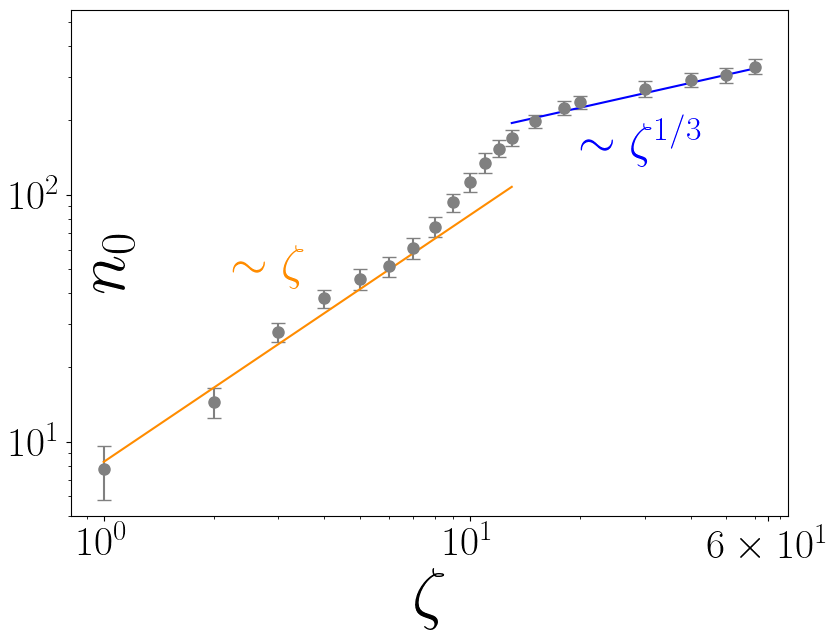

In [22]:
x1, x2, y1, y2 = 1, 13, 7.8, 135
x3, x4, y3, y4 = 20, 60, 200, 300

zetaMat = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.0, 12.0, 13.0, 15, 18, 20, 30, 40, 50, 60]
zetaMat1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11.0, 12.0,13.0]
zetaMat2=[13.0,15,18,20,30,40,50,60]

averages = []
std_devs = []

for zeta in zetaMat:
    input_file = f"average_file_zeta_{zeta}.txt"
    try:
        data = np.loadtxt(input_file)
        last_row = data[-1]
        avg_value = np.nanmean(last_row[1:])/2   # Divide by 2 to get half the value
        std_dev = np.nanstd(last_row[1:])/2   # Divide by 2 to get half the value
        averages.append(avg_value)
        std_devs.append(std_dev)
    except FileNotFoundError:
        print(f"File not found: {input_file}")
# print(averages)
np.savetxt("last_rows_vs_zeta.txt", np.column_stack((zetaMat, averages, std_devs)))

plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(8.5,6.5))
ax.errorbar(zetaMat, averages, yerr=std_devs, fmt='o-', markersize=8, capsize=5, color='gray', linestyle='')

# ax.plot([x1, x2], [y1, y2], linestyle='solid', color='darkorange')
# ax.plot([x3, x4], [y3, y4], linestyle='solid', color='red')
ax.text(np.sqrt(x1 * x2 -8), np.sqrt(y1 * y2 + 1000), r"$\sim \zeta$", fontsize=35,color='darkorange')
ax.text(np.sqrt(x3 * x4 - 800), np.sqrt(y3 * y4 - 40000 ), r"$\sim \zeta^{1/3}$", fontsize=35,color='blue')
ax.plot(zetaMat2,83*np.array(zetaMat2)**(1/3),color='blue')
ax.plot(zetaMat1,8.28*np.array(zetaMat1)**(1.0),color='darkorange')
ax.set_xscale('log')
ax.set_yscale('log')

# Use an appropriate font size (e.g., 15) instead of 'large'
ax.set_xlabel(r' $\zeta$', fontsize=large)
# ax.set_ylabel(r"$n_{0}$", rotation='horizontal',fontsize=large)
ax.text(0.05, 0.5, r"$n_{0}$", va='center', ha='center', rotation='vertical', transform=ax.transAxes, fontsize=large, color='black')
# ax.text(0.07, 0.95, r"$n_{0}$", va='center', ha='center', rotation='horizontal', transform=ax.transAxes, fontsize=large, color='black')
# ax.text(0.8, 0.1, r"$~\zeta$", va='center', ha='center', transform=ax.transAxes, fontsize=large, color='black')
ax.set_ylim(5,560)
ax.set_xticks([1e0, 1e1, 6.5e1])
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_xaxis().set_minor_formatter(plt.NullFormatter())
ax.set_xticklabels(['$10^{0}$', '$10^{1}$', '$6 \\times 10^{1}$'], fontsize=medium)

ax.set_yticks([10, 100])
ax.get_yaxis().set_major_formatter(plt.ScalarFormatter())
ax.get_yaxis().set_minor_formatter(plt.NullFormatter())
ax.set_yticklabels(['$10^{1}$', '$10^{2}$'], fontsize=medium)

plt.tight_layout()
plt.savefig("contractility_image_config_3.pdf", dpi=600, format='pdf',transparent=True)
plt.show()

# Scaling of defect number $\rho$

According to Yurke et.al [1], Eqn. 14, coarsening of topological defect is slow and contain logarithmic relaxation, such that the following relationship hold: 
$$
\frac{1}{\rho^2}\frac{d\rho}{dt} = \frac{K}{\ln(\frac{\rho}{\rho_c})} \\
\Rightarrow \rho = \rho_c\exp(\frac{K}{\frac{1}{\rho^2}\frac{d\rho}{dt}})\\
\therefore \rho = \rho_c\exp(-\frac{K}{Y}),
$$
where $Y = - \frac{1}{\rho^2}\frac{d\rho}{dt}$.

Therefore, if the equilibrium relationship holds then we expect the number of defects to decay exponentially with $1/Y$

[1] Coarsening dynamics of the XY model, Yurke et.al., PRE, 1993
# Observed scaling

Clearly, the plot above does not show exponential decay. From the plot above, it seems that $n$ is a power law function of $Y$: $n(Y) = C_1Y^{\theta} + n_0$, where $n_0$ is the steady state number of defects. Therefore, 
$$
n - n_0 = C_1Y^{\theta}
$$

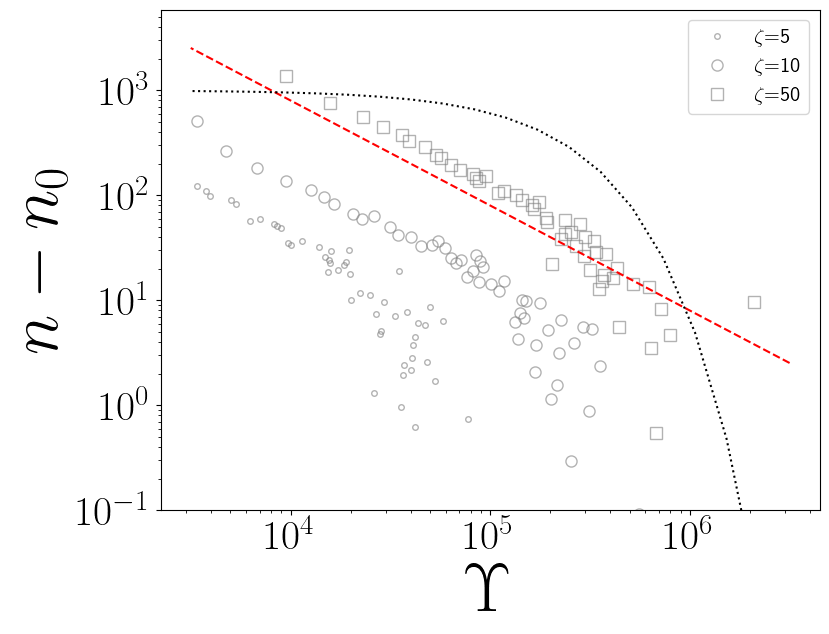

In [23]:
zetaMat = [5, 10, 50]
m = ['.', 'o', 's', 'd', '^', 'v', '>', '^']
plt.close()
fig, ax = plt.subplots(figsize=(8.5, 6.5))
ctr = -1

for zeta in zetaMat:
    ctr += 1
    input_file = f"average_file_zeta_{zeta}.txt"
    data = np.loadtxt(input_file)
    rho = np.nanmean(data, axis=1)[1:]
    t = np.arange(0, rho.size)

    dRhodt = np.diff(rho) / np.diff(t)
    Y = -dRhodt / rho[0:-1]**2
    Rho = rho[0:-1]
    Rho0 = np.min(Rho)
    norm = np.max(Rho) - Rho0
    Z = (Rho - Rho0)
    iid = np.argsort(1. / Y)

    ax.plot((1. / Y[iid])[::2], Z[iid][::2],ls='', marker=m[ctr], markersize=8, alpha=0.6, markerfacecolor='None', color='gray', label=r"$\zeta$=%d" % zeta)

YY = np.logspace(-6.5, -3.5, 20)

ax.plot(1. / YY, (8e6 * YY), '--', color='red')

ax.plot(1. / YY, 1e3 * np.exp(-5e-6 / YY), ':', color='black')

ax.set_xscale('log')
ax.set_yscale('log')
# ax.set_xlim(left=0)
ax.set_ylim(bottom=1e-1)

ax.legend(fontsize=15)
ax.set_xlabel(r"$\Upsilon$", fontsize=large)
ax.set_ylabel(r"$n - n_0$", fontsize=large)

ax.tick_params(axis='both', which='major', labelsize=medium)
plt.savefig("defect_density_active.pdf")


# The evolution of the Aster size with time 
The evolution of Aster sizes in $\mu m^2$ with time.

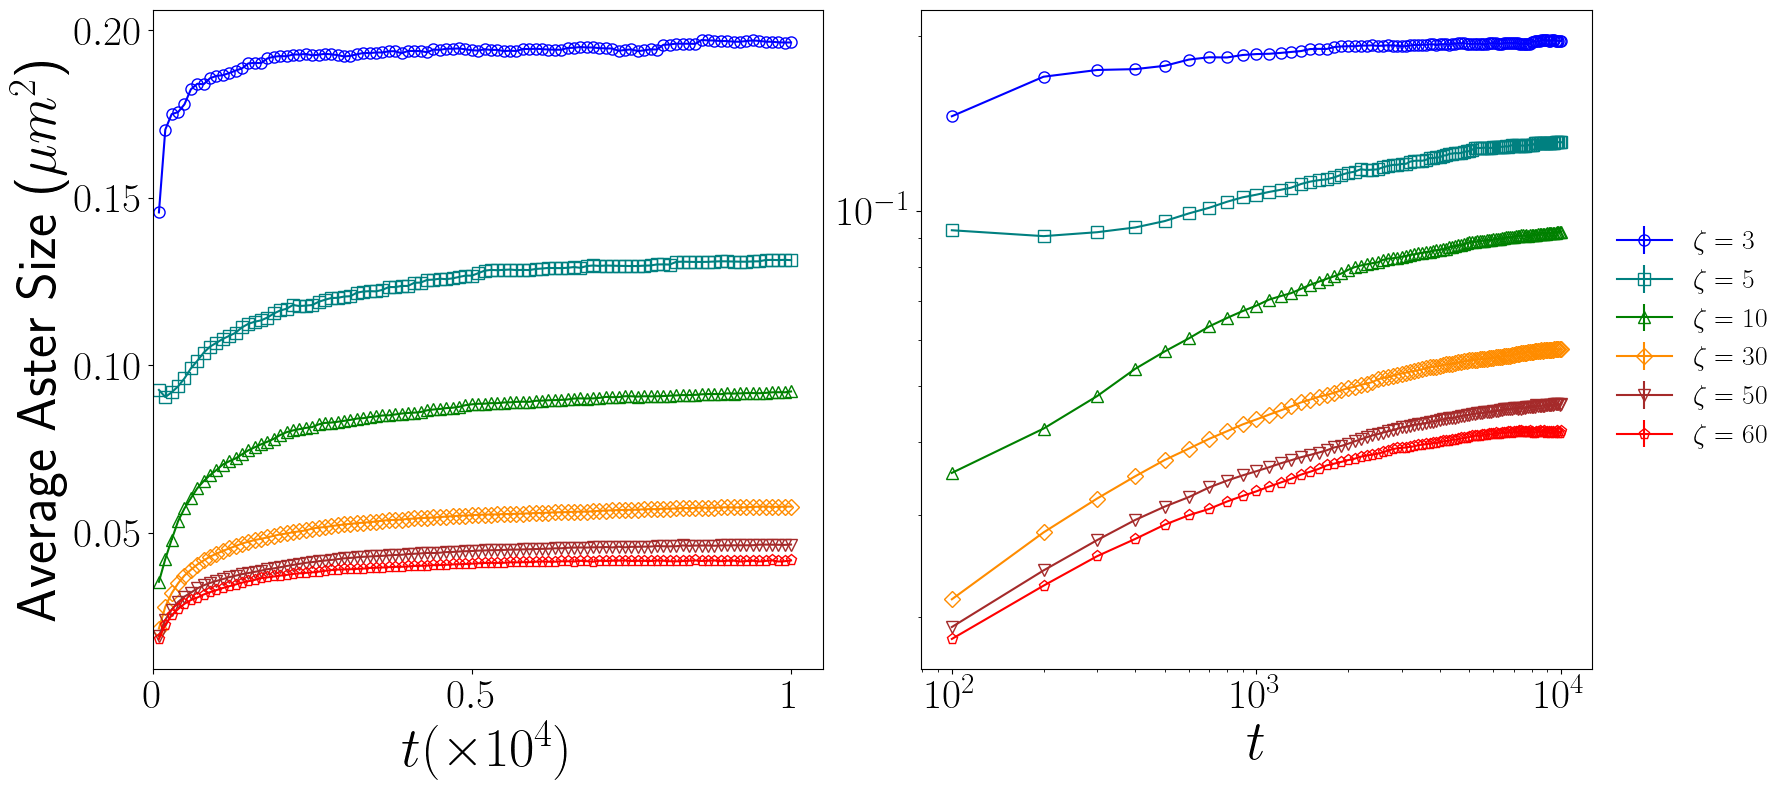

In [24]:
# zeta_list = [3,4,5,6,7,8,9, 10, 11.0, 11.2, 11.4, 11.6, 11.8, 12.0, 12.2, 12.4, 12.6, 12.8, 13.0, 15, 18, 20,25, 30,35, 40, 50, 60]
zeta_list = [3, 5, 10, 30, 50,60]
dt = 1e-3

# Correct subplots formatting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Use a colormap to differentiate curves
colors = ['blue','teal', 'green', 'darkorange', 'brown', 'red']
markers = ['o', 's', '^', 'D', 'v', 'p']

# Loop over zeta_list and plot on both axes
for i, zeta in enumerate(zeta_list):
    row_averages = np.loadtxt('aster_size_averages_zeta_%s.txt' % zeta)/(31*31)
    std_dev = np.std(row_averages)/(31*31)
    x_values = np.arange(100, 10001, 100)
    
    # Plot on ax1
    ax1.errorbar(x_values, row_averages, yerr=std_dev, label=r'$\zeta = %d$' % zeta, 
                 color=colors[i], marker=markers[i], markerfacecolor='none', markersize=8)
    
    # Plot on ax2
    ax2.errorbar(x_values, row_averages, yerr=std_dev, label=r'$\zeta = %d$' % zeta, 
                 color=colors[i], marker=markers[i], markerfacecolor='none', markersize=8)

# Customize ax2 (log-log plot)
ax2.set_xlabel(r'$t$', fontsize=40)
ax1.set_ylabel(r'Average Aster Size ($\mu m^{2}$)', fontsize=40)
ax2.set_xscale('log')
ax2.set_yscale('log')

# Make tick labels bigger for ax2
ax2.tick_params(axis='x', labelsize=30)
ax2.tick_params(axis='y', labelsize=30)

# Customize ax1 (linear scale)
ax1.set_xlim(left=0)
ax1.set_xticks(np.array([0, 5e6, 1e7]) * dt)
ax1.set_xticklabels([r'$0$', r'$0.5$', r'$1$'], fontsize=30)
ax1.set_xlabel(r'$t(\times 10^{4})$', fontsize=40)
#ax1.set_yticks(np.array([0, 50, 100, 200]))
#ax1.set_yticklabels([r'$0$', r'50', r'$100$', r'$200$'], fontsize=30)

# Set tick parameters for ax1
ax1.tick_params(axis='x', labelsize=30)
ax1.tick_params(axis='y', labelsize=30)

# Position the legend to the right of the plot
legend = ax2.legend(loc='center left', fontsize=20, bbox_to_anchor=(1, 0.5), ncol=1, framealpha=0.0)

# Ensure the layout adjusts properly to accommodate the legend
plt.tight_layout()

# Save the figure
plt.savefig('dropletsize.png', dpi=600)

# Show the plot
plt.show()
